## Network Biology 
### Coding Assignment 3
#### Submitted By: Divyanshu Srivastava

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
from Bio.PDB import *
from IPython.display import HTML, display
import tabulate
from __future__ import division
from IPython.display import Image

#### Question 1


In [78]:
## Initialization

genes = 25
tfbs_pool = 10
tfbs_per_gene = 3

gene_pool = {}
for g in range(genes):
    gene_pool[g] = random.sample(range(tfbs_pool), tfbs_per_gene)

steps_of_evolution = 100

p_gene_dublication = 0.05
p_gene_deletion = 0.25
p_tfbs_dublication = 0.45
p_tfbs_deletion = 0.25
p_vector = [p_gene_dublication, p_gene_deletion, p_tfbs_dublication, p_tfbs_deletion]

filename = "network-" + str(genes) + "-" + str(tfbs_pool) + "-" + str(tfbs_per_gene)
filename = filename + "-" + str(p_vector[0]) + "-" + str(p_vector[1]) + "-" 
filename = filename + str(p_vector[2])+ "-" + str(p_vector[3]) + ".gml"

## Evolution
for s in range(steps_of_evolution):
    r = np.random.choice(len(p_vector), p = p_vector)
    if r == 0:
        print "Evolution Step : " + str (s) + " Gene Dublication"
        gene_to_dublicate = random.sample(range(genes), 1)[0]
        gene_pool[genes] = copy.deepcopy(gene_pool[gene_to_dublicate])
        genes = genes + 1;
    elif r == 1:
        print "Evolution Step : " + str (s) + " Gene Deletion"
        gene_to_delete = random.sample(range(genes), 1)[0]
        for i in range(gene_to_delete, genes-1):
            gene_pool[i] = copy.deepcopy(gene_pool[i+1])
        gene_pool.pop(genes - 1)
        genes = genes-1
        if genes == 0:
            print "Gene Pool Empty !"
            break
    elif r == 2:
#         print "Evolution Step : " + str (s) + " TFBS Dublication"
        tfbs_probability = np.array(range(0, tfbs_pool))
        for g in gene_pool:
            for value in gene_pool[g]:
                tfbs_probability[value] = tfbs_probability[value]+1
        tfbs_probability = tfbs_probability.astype(np.float)
        tfbs_probability = tfbs_probability / np.sum(tfbs_probability)
        tfbs_to_dublicate = np.random.choice(tfbs_pool, p = tfbs_probability)
        flag = False
        while not flag:
            gene_target = np.random.choice(gene_pool.keys())
            if tfbs_to_dublicate not in gene_pool[gene_target]:
                gene_pool[gene_target].append(tfbs_to_dublicate)
                flag = True
    else:
#         print "Evolution Step : " + str (s) + " TFBS Deletion"
        gene_target = np.random.choice(gene_pool.keys())
        tfbs_to_delete = np.random.choice(gene_pool[gene_target])
        gene_pool[gene_target].remove(tfbs_to_delete)
        if len(gene_pool[gene_target]) == 0:
            gene_to_delete = gene_target
            for i in range(gene_to_delete, genes-1):
                gene_pool[i] = copy.deepcopy(gene_pool[i+1])
            gene_pool.pop(genes - 1)
            genes = genes-1
            if genes == 0:
                print "Gene Pool Empty !"
                break
                
## Building coevolution network
G = nx.Graph()
for g_a in gene_pool.keys():
    for g_b in gene_pool.keys():
        if not g_a == g_b: 
            if len(set(gene_pool[g_a]).intersection(gene_pool[g_b])) > 0:
                G.add_edge(g_a, g_b)

nx.write_gml(G, 'gml files/' + filename)

Evolution Step : 5 Gene Deletion
Evolution Step : 10 Gene Deletion
Evolution Step : 11 Gene Deletion
Evolution Step : 14 Gene Deletion
Evolution Step : 17 Gene Deletion
Evolution Step : 18 Gene Dublication
Evolution Step : 19 Gene Deletion
Evolution Step : 21 Gene Deletion
Evolution Step : 23 Gene Deletion
Evolution Step : 24 Gene Dublication
Evolution Step : 26 Gene Deletion
Evolution Step : 28 Gene Deletion
Evolution Step : 32 Gene Deletion
Evolution Step : 33 Gene Deletion
Evolution Step : 38 Gene Deletion
Evolution Step : 40 Gene Deletion
Evolution Step : 42 Gene Dublication
Evolution Step : 43 Gene Deletion
Evolution Step : 47 Gene Dublication
Evolution Step : 48 Gene Deletion
Evolution Step : 55 Gene Dublication
Evolution Step : 58 Gene Deletion
Evolution Step : 59 Gene Deletion
Evolution Step : 62 Gene Deletion
Evolution Step : 65 Gene Deletion
Evolution Step : 66 Gene Deletion
Evolution Step : 67 Gene Deletion
Evolution Step : 70 Gene Dublication
Evolution Step : 71 Gene Deleti

In [61]:
gene_pool

{0: [3, 1, 7],
 1: [5],
 2: [5, 9, 7, 6],
 3: [3, 1, 7],
 4: [0, 5, 8],
 5: [2, 3, 7],
 6: [5, 1, 7, 6, 9, 3],
 7: [1, 3, 6, 8, 5, 4]}

Final Coexpression network (images exported from Cytoscape)

Genes : 15
TFBS : 5
TFBS per gene : 2
p_gene_dublication, p_gene_deletion, p_tfbs_dublication, p_tfbs_deletion
0.25, 0.25, 0.25, 0.25


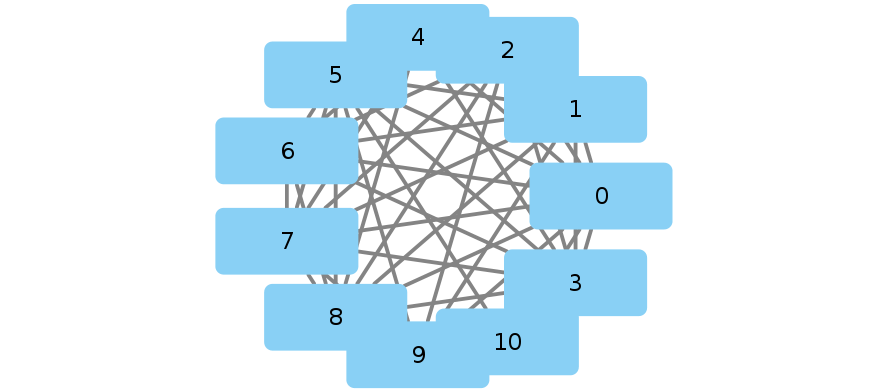

In [48]:
print "Genes : 15"
print "TFBS : 5"
print "TFBS per gene : 2"
print "p_gene_dublication, p_gene_deletion, p_tfbs_dublication, p_tfbs_deletion"
print "0.25, 0.25, 0.25, 0.25"
Image("gml files/network-15-5-2-0.25-0.25-0.25-0.25.gml.png")

Genes : 15
TFBS : 50
TFBS per gene : 2
p_gene_dublication, p_gene_deletion, p_tfbs_dublication, p_tfbs_deletion
0.25, 0.25, 0.25, 0.25


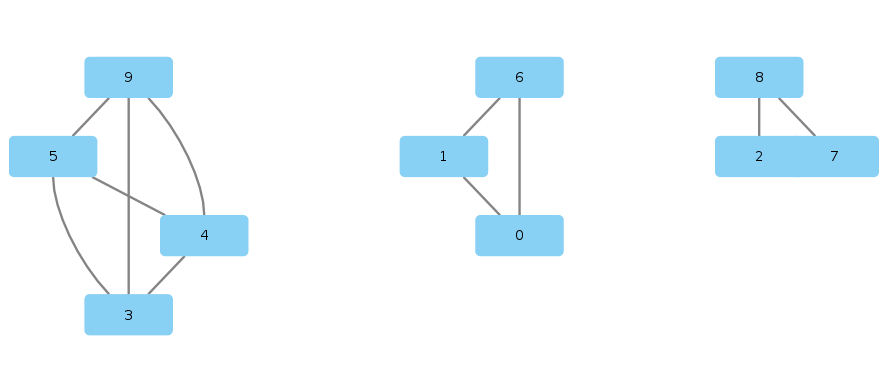

In [49]:
print "Genes : 15"
print "TFBS : 50"
print "TFBS per gene : 2"
print "p_gene_dublication, p_gene_deletion, p_tfbs_dublication, p_tfbs_deletion"
print "0.25, 0.25, 0.25, 0.25"
Image("gml files/network-15-50-2-0.25-0.25-0.25-0.25.gml.png")

Genes : 25
TFBS : 10
TFBS per gene : 3
p_gene_dublication, p_gene_deletion, p_tfbs_dublication, p_tfbs_deletion
0.25, 0.25, 0, 0.5


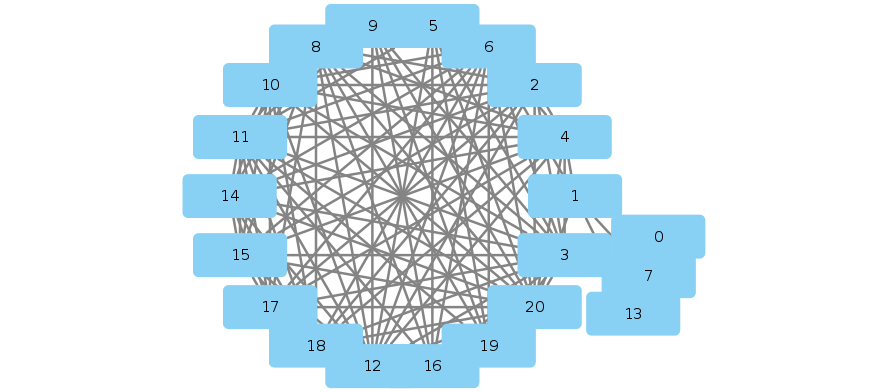

In [51]:
print "Genes : 25"
print "TFBS : 10"
print "TFBS per gene : 3"
print "p_gene_dublication, p_gene_deletion, p_tfbs_dublication, p_tfbs_deletion"
print "0.25, 0.25, 0, 0.5"
Image("gml files/network-25-10-3-0.25-0.25-0-0.5.gml.png")

Degree Distribution for cases <br>
i. Gene Duplication ≪ TFBS Duplication <br>
ii. TFBS Duplication ≫ Gene Duplication <br>
iii. Gene Duplication ≈ TFBS Duplication.

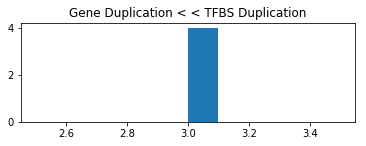

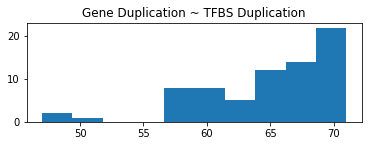

In [83]:
plt.subplot(211)
G1 = nx.read_gml('gml files/network-25-10-3-0.05-0.25-0.45-0.25.gml')
plt.hist(G1.degree().values())
plt.title("Gene Duplication < < TFBS Duplication")
plt.show()
plt.subplot(212)
G2 = nx.read_gml('gml files/network-25-10-3-0.49-0.01-0.49-0.01.gml')
plt.hist(G2.degree().values())
plt.title("Gene Duplication ~ TFBS Duplication")
plt.show()

##### Analysis and comclusion
When Gene Duplication is very less than tfbs dublication, most of the genes end up having all the tfbs in common, thereby giving all nodes the same degree. When gene duplication probability is comparable with tfbs dublication, the gene_pool expands, and at the sme time, more and more connections gets added (as tfbs are also dublicating). Thus we get a very richly connected network.

#### Question 2


In [84]:
def get_RIG(coordinates, labels, cut_off):
    """this function computes residue interaction graphs"""
    RIG = nx.Graph()
    label_ids = range(len(labels))
    RIG.add_nodes_from(label_ids)
    for i in label_ids:
        for j in label_ids:
            if not i == j:
                if np.linalg.norm(coordinates[i] - coordinates[j]) < 7:
                    RIG.add_edge(i, j)
    return RIG

def get_LIN(RIG, threshold):
    """this function computes long range network"""
    LIN = nx.Graph(RIG)
    for e in LIN.edges():
        if not abs(e[0] - e[1]) == 1:
            if abs(e[0] - e[1]) < threshold:
                LIN.remove_edge(e[0], e[1])
    return LIN

In [85]:
RIG_CUTOFF = 7
LIN_THRESHOLD = 12

parser = PDBParser()
pdb_files = ['1csp.pdb', '1hrc.pdb', '1pks.pdb', '2abd.pdb','3mef.pdb']
RIG = []
LIN = []


for pdb_file in pdb_files:
    structure = parser.get_structure('pdb_file', 'pdb files/' + pdb_file)
    coordinates = []
    labels = []
    for model in structure:
        for chain in model:
            for residue in chain:
                try:
                    coordinates.append(residue['CA'].get_coord())
                    labels.append(residue.get_resname())
                except KeyError:
                    pass
            RIG.append(get_RIG(coordinates, labels, RIG_CUTOFF))
            LIN.append(get_LIN(RIG[-1], LIN_THRESHOLD))
            break     ## working on chain id A only
        break         ## Working on model id 0 only
        
        
output = [['PBD ID', 'Nodes', 'Edges (RIG)', 'L (RIG)', 'C (RIG)', 'Edges (LIN)', 'L (LIN)', 'C (LIN)']]
for i in range(len(pdb_files)):
    append_list = [pdb_files[i], RIG[i].number_of_nodes(), RIG[i].number_of_edges()]
    append_list.append(nx.average_shortest_path_length(RIG[i]))
    append_list.append(nx.average_clustering(RIG[i]))
    append_list.append(LIN[i].number_of_edges())
    append_list.append(nx.average_shortest_path_length(LIN[i]))
    append_list.append(nx.average_clustering(LIN[i]))
    output.append(append_list)

display(HTML(tabulate.tabulate(output, tablefmt='html')))

##### Observations
1csp and 1pks proteins show high cllustering coefficients in LIN models, suggesting that they have high rate of foldings. 
A high clustering coefficint makes a protein to fold quickly.

#### Question 3


In [86]:
def get_Bartoli_RIG_Model(nodes, edges):
    """this function computes bartoli's model of residue interaction graphs"""
    Bartoli_RIG_Model = nx.Graph()
    Bartoli_RIG_Model.add_nodes_from(range(nodes))
    # adding backbone chain
    Bartoli_RIG_Model.add_path(range(nodes))
    # making other links
    d = {}      # dictionary key: absolute difference, values: possible pairs
    for i in range(nodes):
        for j in range(nodes):
            if abs(i-j) in d:
                d[abs(i-j)].append((i, j))
            else:
                d[abs(i-j)] = [(i, j)]
    del(d[0])        # not required
    del(d[1])        # already handled in backbone
    p = np.asarray([len(x) for x in d.values()]).astype(np.float)
    p = p/np.sum(p)
    while not nx.number_of_edges(Bartoli_RIG_Model) > edges:
        x = random.choice(d[np.random.choice(d.keys())])
    #     np.random.choice(d[np.random.choice(d.keys(), p)])
        Bartoli_RIG_Model.add_edge(x[0]-1, x[1]-1)
        Bartoli_RIG_Model.add_edge(x[0]-1, x[1])
        Bartoli_RIG_Model.add_edge(x[0]-1, x[1]+1)
        Bartoli_RIG_Model.add_edge(x[0], x[1]-1)
        Bartoli_RIG_Model.add_edge(x[0], x[1])
        Bartoli_RIG_Model.add_edge(x[0], x[1]+1)
        Bartoli_RIG_Model.add_edge(x[0]+1, x[1]-1)
        Bartoli_RIG_Model.add_edge(x[0]+1, x[1])
        Bartoli_RIG_Model.add_edge(x[0]+1, x[1]+1)
    return Bartoli_RIG_Model


In [87]:
## Bartoli's model for protein contact map models.

Bartoli_RIG_Model = []

for rig in RIG:
    nodes = nx.number_of_nodes(rig)
    edges = nx.number_of_edges(rig)
    Bartoli_RIG_Model.append(get_Bartoli_RIG_Model(nodes, edges))
    
    
output = [['PBD ID', 'Nodes', 'Edges (RIG)', 'L (RIG)', 'C (RIG)', 'Edges (Bartoli)', 'L (Bartoli)', 'C (Bartoli)']]
for i in range(len(pdb_files)):
    append_list = [pdb_files[i], RIG[i].number_of_nodes(), RIG[i].number_of_edges()]
    append_list.append(nx.average_shortest_path_length(RIG[i]))
    append_list.append(nx.average_clustering(RIG[i]))
    append_list.append(Bartoli_RIG_Model[i].number_of_edges())
    append_list.append(nx.average_shortest_path_length(Bartoli_RIG_Model[i]))
    append_list.append(nx.average_clustering(Bartoli_RIG_Model[i]))
    output.append(append_list)

display(HTML(tabulate.tabulate(output, tablefmt='html')))

#### Observations
Bartoli's Models, when compared with the the original RIG models show that the characteristic path length and average clustering coefficients both are comparable. Clustering coefficients is a bit lower that true values.

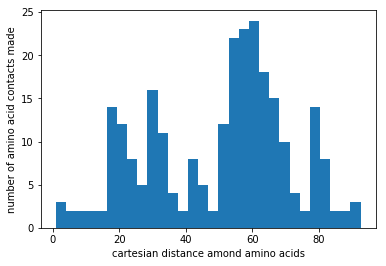

In [89]:
x = []
for e in Bartoli_RIG_Model[0].edges():
    x.append(np.linalg.norm(e))

plt.hist(x, bins = 30)
plt.xlabel('cartesian distance amond amino acids')
plt.ylabel('number of amino acid contacts made')
plt.show()

#### Question 4


ODD-ODD PIN
~~~~~~~~~~~

Nodes : 100
Edges : 3741
Sparseness : 0.2518
Characteristic Path Length (L) : Graph is not connected.
Average Clustering Coefficient (C) : 0.87


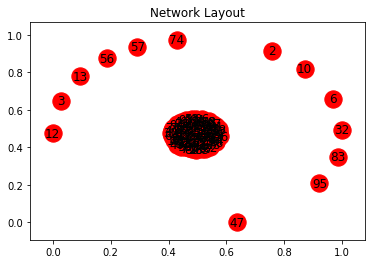

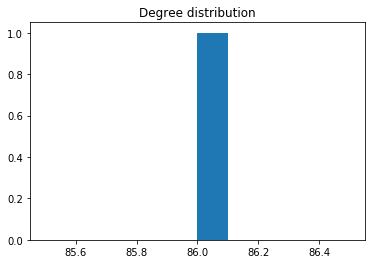

In [90]:
def display_graph(G):
    print "Nodes : " + str(G.number_of_nodes())
    print "Edges : " + str(G.number_of_edges())
    density = G.number_of_edges() / (G.number_of_nodes()*G.number_of_nodes()/2)
    print "Sparseness : " + str(1-density)
    try:
        print "Characteristic Path Length (L) : " + str(nx.average_shortest_path_length(G))
    except Exception as e:
        print "Characteristic Path Length (L) : " + str(e)       
    print "Average Clustering Coefficient (C) : " + str(nx.average_clustering(G))


    nx.draw_networkx(G)
    plt.title('Network Layout')
    plt.show()

    plt.hist(G.degree()[0])
    plt.title('Degree distribution')
    plt.show()


n_protein = 100
n_protein_domains = 50
domain_per_protein = 3
protein_domains = range(n_protein_domains)
protein = np.asmatrix([random.sample(range(n_protein_domains), domain_per_protein) for x in range(n_protein)])

G_odd_odd = nx.Graph()
G_odd_odd.add_nodes_from(range(n_protein))
for x in range(n_protein):
    for y in range(n_protein):
        if not x == y:
            if np.any(protein[x,] % 2) and np.any(protein[y,] % 2):
                G_odd_odd.add_edge(x, y)

print "ODD-ODD PIN"
print "~~~~~~~~~~~"
print ""
display_graph(G_odd_odd)

EVEN-EVEN PIN
~~~~~~~~~~~~~

Nodes : 100
Edges : 4005
Sparseness : 0.199
Characteristic Path Length (L) : Graph is not connected.
Average Clustering Coefficient (C) : 0.9


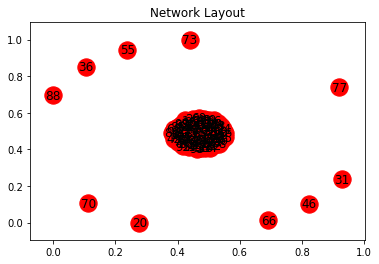

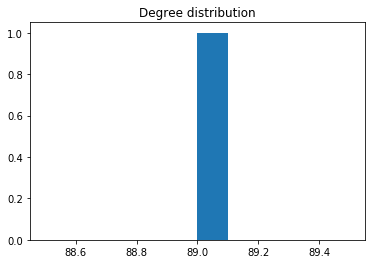

In [91]:
G_even_even = nx.Graph()
G_even_even.add_nodes_from(range(n_protein))
for x in range(n_protein):
    for y in range(n_protein):
        if not x == y:
            if not np.all(protein[x,] % 2) and not np.all(protein[y,] % 2):
                G_even_even.add_edge(x, y)

print "EVEN-EVEN PIN"
print "~~~~~~~~~~~~~"
print ""
display_graph(G_even_even)

ODD-EVEN PIN
~~~~~~~~~~~~~

Nodes : 100
Edges : 4827
Sparseness : 0.0346
Characteristic Path Length (L) : 1.02484848485
Average Clustering Coefficient (C) : 0.976964871926


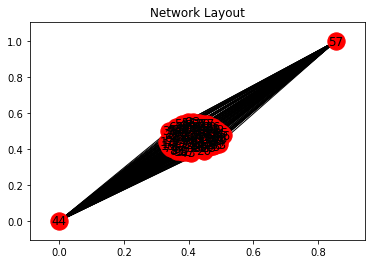

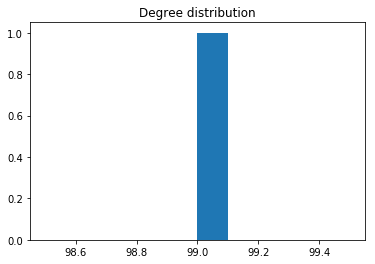

In [92]:
G_odd_even = nx.Graph()
G_odd_even.add_nodes_from(range(n_protein))
for x in range(n_protein):
    for y in range(n_protein):
        if not x == y:
            if (np.any(protein[x,] % 2) and not np.all(protein[y,] % 2)) or (not np.all(protein[x,] % 2) and np.any(protein[y,] % 2)):
                G_odd_even.add_edge(x, y)

print "ODD-EVEN PIN"
print "~~~~~~~~~~~~~"
print ""
display_graph(G_odd_even)

PRIME PRIME PIN
~~~~~~~~~~~~~~~

Nodes : 100
Edges : 1770
Sparseness : 0.646
Characteristic Path Length (L) : Graph is not connected.
Average Clustering Coefficient (C) : 0.6


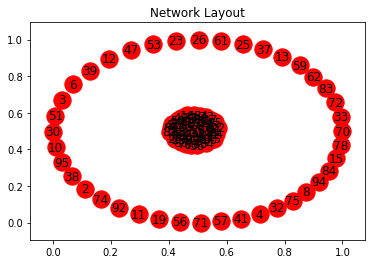

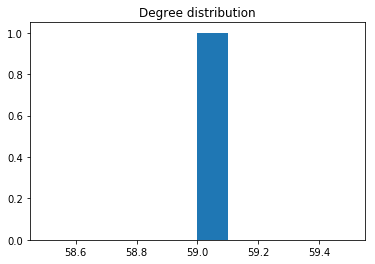

In [93]:
def is_prime(a):
    if a < 3:
        return False
    return all(a % i for i in xrange(2, a))

G_prime_prime = nx.Graph()
G_prime_prime.add_nodes_from(range(n_protein))
for x in range(n_protein):
    for y in range(n_protein):
        if not x == y:
            x_prime = []
            y_prime = []
            for z in range(domain_per_protein):
                x_prime.append(is_prime(protein[x, z]))
                y_prime.append(is_prime(protein[y, z]))
            if any(x_prime) and any(y_prime):
                G_prime_prime.add_edge(x, y)

print "PRIME PRIME PIN"
print "~~~~~~~~~~~~~~~"
print ""
display_graph(G_prime_prime)